In [1]:
from datetime import datetime
expenses = []

while True:
    print("\n== Personal Expense Tracker ===")
    print("1. Add Expense")
    print("2. View All Expenses")
    print("3. View Total and Average Spending")
    print("4. Exit")

    choice = input("Choose an option (1-4): ")

    if choice == '1':
        amount = float(input("Enter amount (₹): "))
        category = input("Enter category (Food, Travel, etc.): ")
        note = input("Enter a short note: ")
        date = datetime.now().strftime("%Y-%m-%d")

        expense = {
            "amount": amount,
            "category": category,
            "note": note,
            "date": date
        }

        expenses.append(expense)
        print("Expense added successfully!")

    elif choice == '2':
        print("\n--- Your Expenses ---")
        if not expenses:
            print("No expenses recorded yet.")
        else:
            for i, e in enumerate(expenses, start=1):
                print(f"{i}. ₹{e['amount']} | {e['category']} | {e['note']} | {e['date']}")

    elif choice == '3':
        if not expenses:
            print("No expenses to calculate.")
        else:
            total = sum(e["amount"] for e in expenses)
            average = total / len(expenses)
            print(f"Total Spent: ₹{total}")
            print(f"Average Spending: ₹{round(average, 2)}")

    elif choice == '4':
        print("Exiting... Goodbye!")
        break

    else:
        print("Invalid choice. Please enter a number from 1 to 4.")


== Personal Expense Tracker ===
1. Add Expense
2. View All Expenses
3. View Total and Average Spending
4. Exit


Choose an option (1-4):  4


Exiting... Goodbye!


Starting GUI...


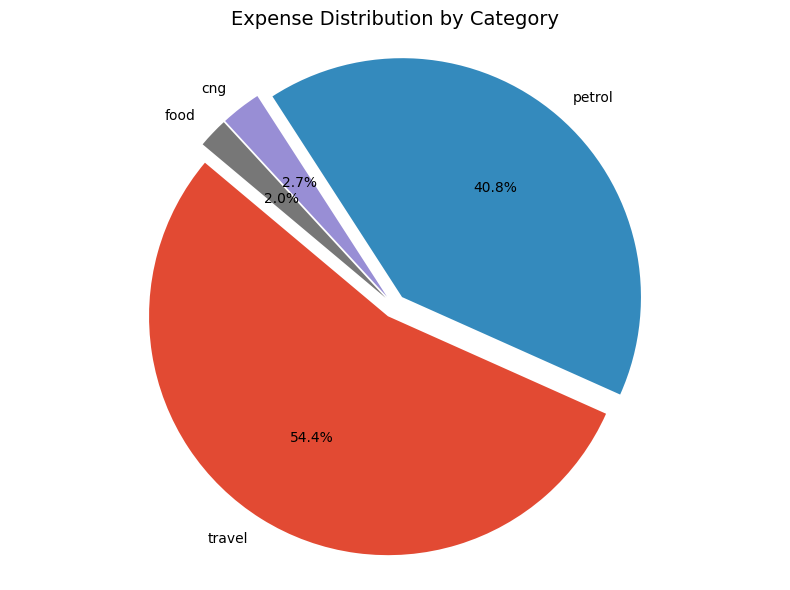

In [2]:
# Run this cell in Jupyter to start the GUI
import os
import json
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import ttkbootstrap as tb
from ttkbootstrap.constants import SUCCESS, INFO, PRIMARY
from tkinter import messagebox

# --- Data Setup ---
file_name = "expenses.json"
expenses = []

if os.path.exists(file_name):
    try:
        with open(file_name, "r") as file:
            expenses = json.load(file)
    except json.JSONDecodeError:
        expenses = []

def save_to_file():
    with open(file_name, "w") as file:
        json.dump(expenses, file, indent=4)

def add_expense():
    amount = entry_amount.get()
    category = entry_category.get()
    note = entry_note.get()
    date = datetime.now().strftime("%Y-%m-%d")

    if not amount.strip() or not category.strip():
        messagebox.showerror("Error", "Amount and Category are required!")
        return

    try:
        amount = float(amount)
    except ValueError:
        messagebox.showerror("Error", "Amount must be a number!")
        return

    expenses.append({
        "amount": amount,
        "category": category,
        "note": note,
        "date": date
    })
    save_to_file()

    save_label.config(text="Expense added successfully!")
    root.after(3000, lambda: save_label.config(text=""))

    entry_amount.delete(0, "end")
    entry_category.delete(0, "end")
    entry_note.delete(0, "end")

def view_expenses():
    output_text.delete("1.0", "end")
    if not expenses:
        output_text.insert("end", "No expenses yet.\n")
    else:
        for i, e in enumerate(expenses, 1):
            output_text.insert("end", f"{i}. ₹{e['amount']} | {e['category']} | {e['note']} | {e['date']}\n")

def view_summary():
    if not expenses:
        messagebox.showinfo("Summary", "No expenses to show.")
        return
    total = sum(e["amount"] for e in expenses)
    average = total / len(expenses)
    messagebox.showinfo("Summary", f"Total Spent: ₹{total}\nAverage Spending: ₹{round(average, 2)}")

def filter_by_category():
    category = entry_category.get().strip().lower()
    output_text.delete("1.0", "end")
    filtered = [e for e in expenses if e["category"].lower() == category]
    if filtered:
        for i, e in enumerate(filtered, 1):
            output_text.insert("end", f"{i}. ₹{e['amount']} | {e['category']} | {e['note']} | {e['date']}\n")
    else:
        output_text.insert("end", "No matching category.\n")

def monthly_summary():
    monthly = defaultdict(float)
    for e in expenses:
        month = e["date"][:7]  # YYYY-MM
        monthly[month] += e["amount"]

    summary = "\n".join([f"{month}: ₹{amount}" for month, amount in monthly.items()])
    messagebox.showinfo("Monthly Summary", summary or "No data.")

previous_chart = None

def show_charts():
    global previous_chart

    if previous_chart is not None:
        plt.close(previous_chart)

    if not expenses:
        messagebox.showinfo("Chart", "No expenses to show.")
        return

    category_totals = defaultdict(float)
    for e in expenses:
        category_totals[e["category"]] += e["amount"]

    sorted_items = sorted(category_totals.items(), key=lambda x: x[1], reverse=True)
    top_items = sorted_items[:5]
    other_total = sum([item[1] for item in sorted_items[5:]])

    categories = [item[0] for item in top_items]
    amounts = [item[1] for item in top_items]

    if other_total > 0:
        categories.append("Other")
        amounts.append(other_total)

    plt.style.use("ggplot")
    fig = plt.figure(figsize=(8, 6))
    plt.pie(amounts, labels=categories, autopct="%1.1f%%", startangle=140,
            textprops={'fontsize': 10}, explode=[0.05]*len(categories))
    plt.title("Expense Distribution by Category", fontsize=14)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

    previous_chart = fig

# --- GUI Setup ---
root = tb.Window(themename="minty")
root.title("Personal Expense Tracker")
root.geometry("460x450")

main_frame = tb.Frame(root, padding=10)
main_frame.grid(row=0, column=0, sticky="n")

tb.Label(main_frame, text="Amount (₹):").grid(row=0, column=0, sticky='w')
entry_amount = tb.Entry(main_frame, width=30)
entry_amount.grid(row=0, column=1, pady=2)

tb.Label(main_frame, text="Category:").grid(row=1, column=0, sticky='w')
entry_category = tb.Entry(main_frame, width=30)
entry_category.grid(row=1, column=1, pady=2)

tb.Label(main_frame, text="Note:").grid(row=2, column=0, sticky='w')
entry_note = tb.Entry(main_frame, width=30)
entry_note.grid(row=2, column=1, pady=2)

tb.Button(main_frame, text="Add Expense", bootstyle="success", command=add_expense).grid(row=3, column=0, pady=5)
tb.Button(main_frame, text="View Expenses", bootstyle="info", command=view_expenses).grid(row=3, column=1, pady=5)
tb.Button(main_frame, text="View Summary", bootstyle="primary", command=view_summary).grid(row=4, column=0, columnspan=2, pady=5)
tb.Button(main_frame, text="Filter Category", bootstyle="secondary", command=filter_by_category).grid(row=5, column=0, columnspan=2, pady=5)
tb.Button(main_frame, text="Monthly Summary", bootstyle="warning", command=monthly_summary).grid(row=6, column=0, columnspan=2, pady=5)
tb.Button(main_frame, text="Show Charts", bootstyle="danger", command=show_charts).grid(row=7, column=0, columnspan=2, pady=5)

save_label = tb.Label(root, text="", foreground="green")
save_label.grid(row=8, column=0, columnspan=2)

output_text = tb.Text(root, height=10, width=56, wrap='word')
output_text.grid(row=9, column=0, columnspan=2, pady=5)

scrollbar = tb.Scrollbar(root, command=output_text.yview)
scrollbar.grid(row=9, column=2, sticky='ns', pady=5)
output_text.config(yscrollcommand=scrollbar.set)

print("Starting GUI...")
root.mainloop()
